In [17]:
import prior

dataset = prior.load_dataset("procthor-10k")
dataset

Fetching reference HEAD


[AI2-THOR WARNING] There has been an update to ProcTHOR-10K that must be used with AI2-THOR version 5.0+. To use the new version of ProcTHOR-10K, please update AI2-THOR to version 5.0+ by running:
    pip install --upgrade ai2thor
Alternatively, to downgrade to the old version of ProcTHOR-10K, run:
   prior.load_dataset("procthor-10k", revision="ab3cacd0fc17754d4c080a3fd50b18395fae8647")


Loading test: 100%|██████████| 1000/1000 [00:00<00:00, 19186.77it/s]


DatasetDict(
    train=Dataset(
    dataset=procthor-dataset,
    size=10000,
    split=train
),
    val=Dataset(
    dataset=procthor-dataset,
    size=1000,
    split=val
),
    test=Dataset(
    dataset=procthor-dataset,
    size=1000,
    split=test
)
)

In [18]:
from ai2thor.controller import Controller


house = dataset["train"][3]
controller = Controller(scene=house, snapToGrid=False, rotateStepDegrees=30)
event = controller.step("Pass")
spawn = event.metadata["agent"]["position"]

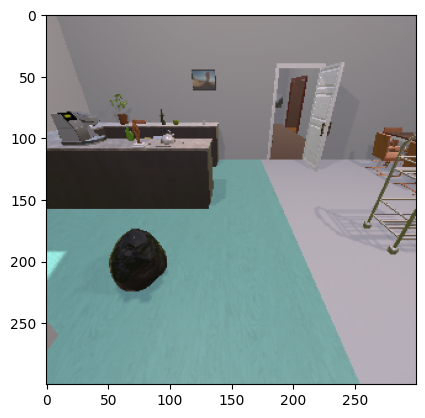

In [19]:
import matplotlib.pyplot as plt
event = controller.step("MoveAhead")
plt.imshow(event.frame)

In [20]:
from rl import PPO, ActorCritic, Env, RolloutBuffer, ClipEnv, CLIPNovelty, load_actor_critic
from models import LSTMActor, LSTMCritic, FrozenResNetEncoder, SlidingWindowTransformerActor, SlidingWindowTransformerCritic
from cons import MINIBATCHES, EPISODE_STEPS, FEAT_DIM, NUM_ACTIONS, DEVICE

In [21]:
# After loading the scene and stepping once:
event = controller.step("Pass")

# Extract bounding box
bounds_meta = event.metadata.get("sceneBounds", None)
if bounds_meta is None:
    raise KeyError("sceneBounds metadata not found")

center = bounds_meta["center"]
size   = bounds_meta["size"]

xmin = center["x"] - size["x"] / 2
xmax = center["x"] + size["x"] / 2
zmin = center["z"] - size["z"] / 2
zmax = center["z"] + size["z"] / 2

x_center = center["x"]
z_center = center["z"]
house_size = max(size["x"], size["z"]) / 2   # or size["x"]/2 if you want

In [22]:
event = controller.step(
    action="AddThirdPartyCamera",
    position={"x": x_center, "y": 20.0, "z": z_center},
    rotation={"x": 90.0, "y": 0.0, "z": 0.0},
    orthographic=True,
    orthographicSize=house_size,
    fieldOfView=60,
    skyboxColor="black"
)

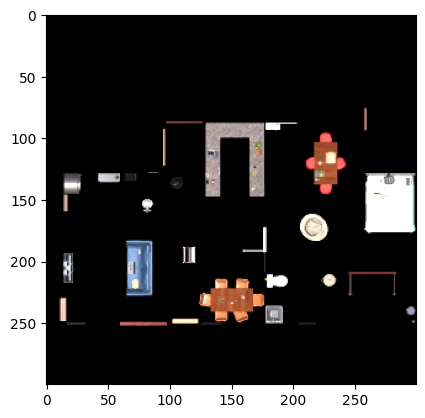

In [23]:
import matplotlib.pyplot as plt
import numpy as np
topdown = event.third_party_camera_frames[0]
plt.imshow(topdown)

In [24]:
from models import FrozenResNetPCAEncoder
import torch
ENTROPY_COEF = 0.05

ppo = PPO(ENTROPY_COEF)
encoder = FrozenResNetPCAEncoder(FEAT_DIM, torch.zeros(FEAT_DIM, 512), device=DEVICE)
actor = SlidingWindowTransformerActor(FEAT_DIM, NUM_ACTIONS)
critic = SlidingWindowTransformerCritic(FEAT_DIM)
clip_novelty = CLIPNovelty()
clip_env = ClipEnv(clip_novelty)
clip_actor_critic = ActorCritic(encoder, actor, critic)

In [25]:
from rl import load_actor_critic

load_actor_critic(clip_actor_critic, "data/combined_novelty/clip_segment_novelty_19.pt", device=DEVICE)

[🔁] Actor-Critic checkpoint loaded from data/combined_novelty/clip_segment_novelty_19.pt


tensor([0.0608, 0.0693, 0.8699])
tensor([0.0977, 0.1207, 0.7816])
tensor([0.0901, 0.1225, 0.7873])
tensor([0.1382, 0.0897, 0.7720])
tensor([0.2275, 0.1312, 0.6413])
tensor([0.1992, 0.1909, 0.6100])
tensor([0.2526, 0.2308, 0.5166])
tensor([0.2850, 0.2197, 0.4953])
tensor([0.4100, 0.1273, 0.4627])
tensor([0.3692, 0.2240, 0.4068])
tensor([0.4456, 0.2528, 0.3016])
tensor([0.4082, 0.2077, 0.3841])
tensor([0.3835, 0.2252, 0.3913])
tensor([0.3906, 0.1960, 0.4133])
tensor([0.4519, 0.2020, 0.3461])
tensor([0.3875, 0.1727, 0.4398])
tensor([0.5088, 0.1312, 0.3600])
tensor([0.2559, 0.2256, 0.5185])
tensor([0.4302, 0.1423, 0.4276])
tensor([0.3616, 0.1808, 0.4576])
tensor([0.4778, 0.1727, 0.3495])
tensor([0.3637, 0.2189, 0.4174])
tensor([0.3522, 0.2483, 0.3995])
tensor([0.4491, 0.1751, 0.3758])
tensor([0.3068, 0.1824, 0.5107])
tensor([0.4596, 0.1472, 0.3931])
tensor([0.5007, 0.1661, 0.3332])
tensor([0.5180, 0.1402, 0.3418])
tensor([0.4898, 0.1639, 0.3463])
tensor([0.3403, 0.2537, 0.4060])
tensor([0.

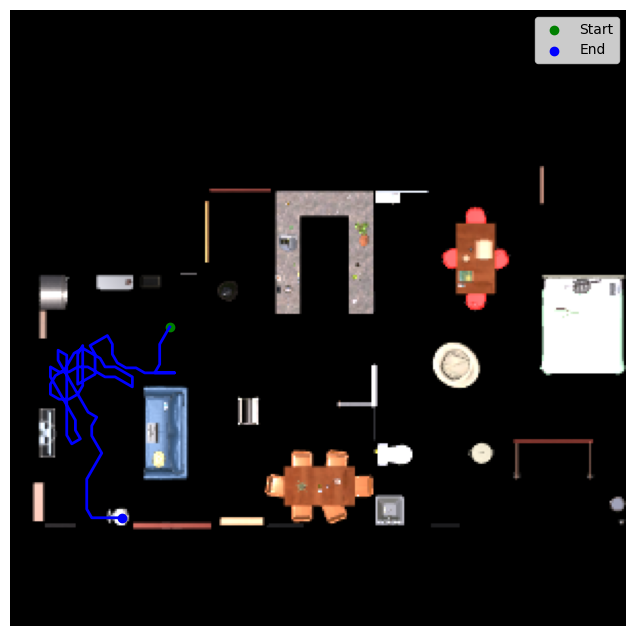

tensor([0.0177, 0.0934, 0.8889])
tensor([0.0093, 0.0683, 0.9224])
tensor([0.0191, 0.1169, 0.8641])
tensor([0.0081, 0.0796, 0.9122])
tensor([0.0217, 0.1394, 0.8389])
tensor([0.0175, 0.2041, 0.7784])
tensor([0.0498, 0.1549, 0.7953])
tensor([0.0113, 0.1209, 0.8678])
tensor([0.0865, 0.3382, 0.5754])
tensor([0.0878, 0.3008, 0.6114])
tensor([0.1037, 0.4945, 0.4018])
tensor([0.1491, 0.4095, 0.4414])
tensor([0.1847, 0.3239, 0.4914])
tensor([0.1418, 0.3199, 0.5383])
tensor([0.0530, 0.2357, 0.7112])
tensor([0.0804, 0.1236, 0.7960])
tensor([0.0747, 0.1990, 0.7263])
tensor([0.0831, 0.1880, 0.7288])
tensor([0.0672, 0.1927, 0.7401])
tensor([0.1005, 0.2031, 0.6964])
tensor([0.1146, 0.2528, 0.6326])
tensor([0.0672, 0.3477, 0.5851])
tensor([0.0881, 0.4285, 0.4834])
tensor([0.1109, 0.3328, 0.5563])
tensor([0.0907, 0.3934, 0.5159])
tensor([0.0594, 0.4189, 0.5217])
tensor([0.1199, 0.4841, 0.3960])
tensor([0.1071, 0.2769, 0.6159])
tensor([0.1255, 0.4957, 0.3788])
tensor([0.1192, 0.2970, 0.5838])
tensor([0.

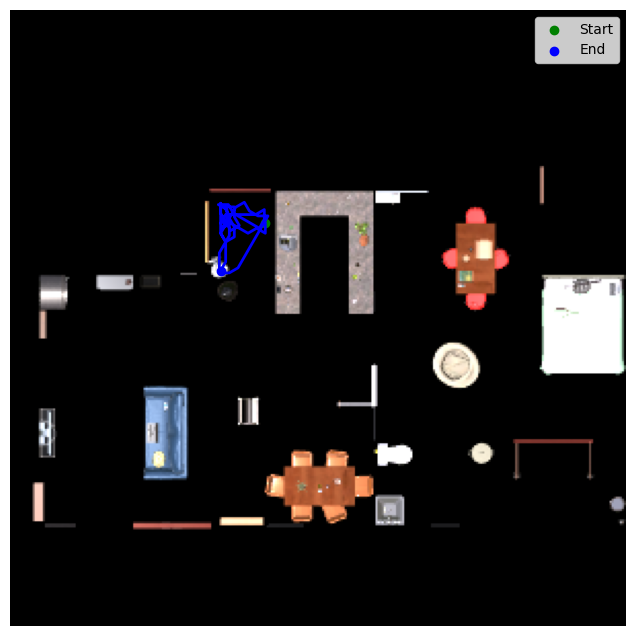

tensor([0.1117, 0.1072, 0.7811])
tensor([0.0639, 0.0627, 0.8734])
tensor([0.1235, 0.0769, 0.7997])
tensor([0.0966, 0.0535, 0.8500])
tensor([0.1916, 0.0710, 0.7374])
tensor([0.2326, 0.1672, 0.6002])
tensor([0.0854, 0.1053, 0.8093])
tensor([0.2344, 0.2699, 0.4958])
tensor([0.2930, 0.1266, 0.5804])
tensor([0.3223, 0.2004, 0.4773])
tensor([0.2615, 0.1032, 0.6353])
tensor([0.1952, 0.1971, 0.6077])
tensor([0.1821, 0.0814, 0.7365])
tensor([0.2713, 0.0823, 0.6464])
tensor([0.3142, 0.1291, 0.5566])
tensor([0.4167, 0.1792, 0.4041])
tensor([0.3693, 0.1113, 0.5193])
tensor([0.1659, 0.1042, 0.7299])
tensor([0.3200, 0.1587, 0.5213])
tensor([0.4780, 0.1183, 0.4036])
tensor([0.2523, 0.1912, 0.5565])
tensor([0.1649, 0.1889, 0.6462])
tensor([0.1976, 0.2105, 0.5920])
tensor([0.3267, 0.2499, 0.4234])
tensor([0.1558, 0.2809, 0.5633])
tensor([0.2887, 0.2029, 0.5084])
tensor([0.1890, 0.3072, 0.5038])
tensor([0.3715, 0.3163, 0.3122])
tensor([0.3676, 0.1815, 0.4509])
tensor([0.2718, 0.2141, 0.5141])
tensor([0.

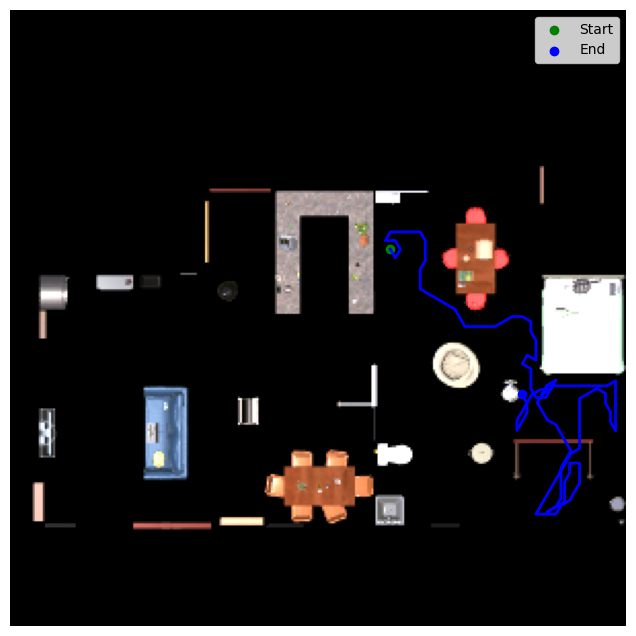

tensor([0.0761, 0.0710, 0.8529])
tensor([0.0978, 0.1227, 0.7795])
tensor([0.0829, 0.1462, 0.7709])
tensor([0.0627, 0.1149, 0.8224])
tensor([0.1143, 0.2361, 0.6496])
tensor([0.1055, 0.1368, 0.7577])
tensor([0.1378, 0.1546, 0.7075])
tensor([0.0992, 0.1310, 0.7698])
tensor([0.1183, 0.2579, 0.6239])
tensor([0.1361, 0.1887, 0.6752])
tensor([0.1732, 0.1727, 0.6541])
tensor([0.1136, 0.1729, 0.7135])
tensor([0.1831, 0.2686, 0.5482])
tensor([0.2349, 0.1345, 0.6307])
tensor([0.2564, 0.1684, 0.5752])
tensor([0.2653, 0.3050, 0.4296])
tensor([0.2058, 0.1476, 0.6466])
tensor([0.3197, 0.1556, 0.5247])
tensor([0.4569, 0.1817, 0.3614])
tensor([0.4134, 0.2956, 0.2910])
tensor([0.3947, 0.2515, 0.3538])
tensor([0.4702, 0.2889, 0.2409])
tensor([0.3831, 0.2385, 0.3784])
tensor([0.3587, 0.2911, 0.3502])
tensor([0.3752, 0.2871, 0.3376])
tensor([0.4443, 0.3121, 0.2436])
tensor([0.3345, 0.2862, 0.3793])
tensor([0.2727, 0.4043, 0.3230])
tensor([0.2332, 0.4509, 0.3159])
tensor([0.1914, 0.5662, 0.2424])
tensor([0.

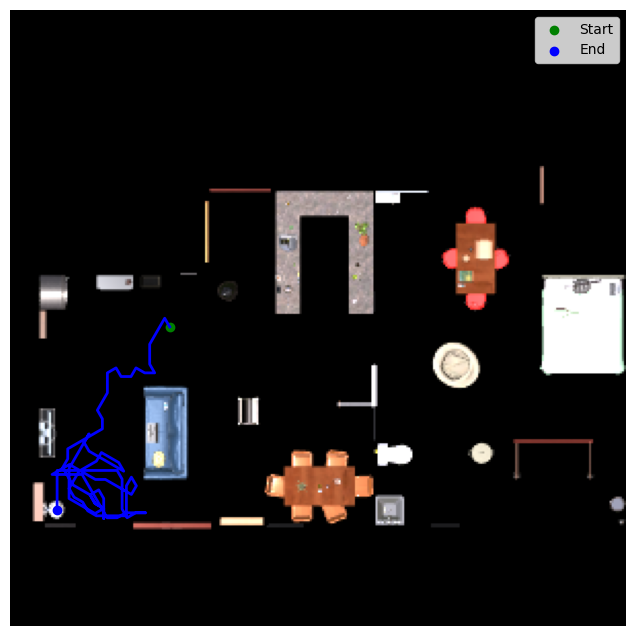

tensor([0.0167, 0.0748, 0.9085])
tensor([0.0127, 0.0551, 0.9322])
tensor([0.0189, 0.1046, 0.8766])
tensor([0.0127, 0.0591, 0.9282])
tensor([0.0196, 0.1153, 0.8650])
tensor([0.0111, 0.1606, 0.8283])
tensor([0.0642, 0.2384, 0.6974])
tensor([0.0157, 0.1273, 0.8570])
tensor([0.0943, 0.3261, 0.5796])
tensor([0.0833, 0.3986, 0.5181])
tensor([0.1734, 0.3171, 0.5095])
tensor([0.1173, 0.3576, 0.5251])
tensor([0.0630, 0.1924, 0.7447])
tensor([0.0506, 0.1471, 0.8023])
tensor([0.0968, 0.1819, 0.7213])
tensor([0.0646, 0.2003, 0.7351])
tensor([0.0504, 0.2564, 0.6933])
tensor([0.0804, 0.2104, 0.7092])
tensor([0.1015, 0.2397, 0.6588])
tensor([0.0686, 0.1554, 0.7760])
tensor([0.1221, 0.2199, 0.6580])
tensor([0.0899, 0.2548, 0.6553])
tensor([0.0950, 0.2142, 0.6908])
tensor([0.1280, 0.2009, 0.6711])
tensor([0.1156, 0.2864, 0.5980])
tensor([0.1258, 0.2180, 0.6562])
tensor([0.1166, 0.3654, 0.5180])
tensor([0.1792, 0.2792, 0.5416])
tensor([0.1415, 0.3626, 0.4958])
tensor([0.1344, 0.2421, 0.6235])
tensor([0.

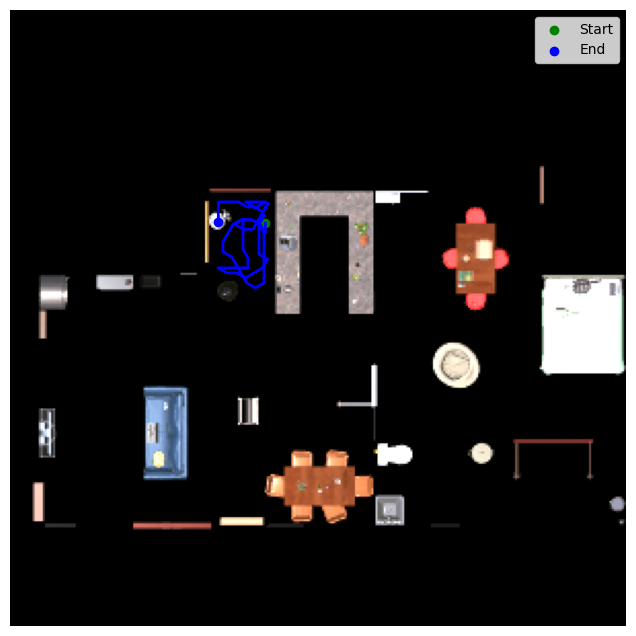

tensor([0.1102, 0.1205, 0.7693])
tensor([0.0676, 0.0556, 0.8768])
tensor([0.0962, 0.0665, 0.8373])
tensor([0.1811, 0.0656, 0.7533])
tensor([0.2104, 0.1266, 0.6630])
tensor([0.1840, 0.0883, 0.7277])
tensor([0.1685, 0.1478, 0.6838])
tensor([0.0785, 0.1633, 0.7582])
tensor([0.2095, 0.2974, 0.4931])
tensor([0.1111, 0.1869, 0.7020])
tensor([0.2662, 0.2652, 0.4686])
tensor([0.1234, 0.1553, 0.7213])
tensor([0.2645, 0.2633, 0.4722])
tensor([0.4248, 0.2360, 0.3392])
tensor([0.3213, 0.3538, 0.3250])
tensor([0.2742, 0.1325, 0.5933])
tensor([0.3493, 0.1332, 0.5175])
tensor([0.3026, 0.1188, 0.5786])
tensor([0.3809, 0.1374, 0.4817])
tensor([0.2822, 0.1471, 0.5707])
tensor([0.2227, 0.0569, 0.7204])
tensor([0.3807, 0.0814, 0.5379])
tensor([0.3549, 0.1231, 0.5220])
tensor([0.4093, 0.2709, 0.3198])
tensor([0.3317, 0.0918, 0.5765])
tensor([0.3617, 0.2334, 0.4048])
tensor([0.3976, 0.1311, 0.4713])
tensor([0.3313, 0.1287, 0.5400])
tensor([0.4077, 0.1146, 0.4777])
tensor([0.3868, 0.2285, 0.3847])
tensor([0.

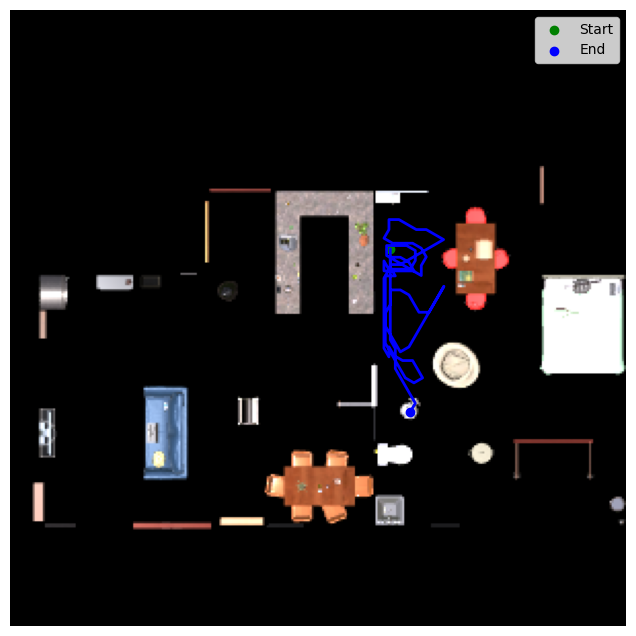

tensor([0.0665, 0.0862, 0.8472])
tensor([0.0696, 0.0971, 0.8333])
tensor([0.1025, 0.1911, 0.7064])
tensor([0.1201, 0.1120, 0.7679])
tensor([0.1496, 0.1155, 0.7349])
tensor([0.2686, 0.1410, 0.5904])
tensor([0.3662, 0.1596, 0.4742])
tensor([0.3521, 0.1856, 0.4622])
tensor([0.4158, 0.2069, 0.3773])
tensor([0.4240, 0.2488, 0.3272])
tensor([0.5330, 0.2017, 0.2653])
tensor([0.5541, 0.2079, 0.2380])
tensor([0.5225, 0.1773, 0.3002])
tensor([0.5034, 0.1686, 0.3280])
tensor([0.3795, 0.2325, 0.3880])
tensor([0.5483, 0.1682, 0.2836])
tensor([0.4015, 0.2558, 0.3427])
tensor([0.3610, 0.2663, 0.3727])
tensor([0.2211, 0.4786, 0.3002])
tensor([0.3398, 0.2879, 0.3723])
tensor([0.2357, 0.4092, 0.3551])
tensor([0.3753, 0.3697, 0.2550])
tensor([0.2277, 0.4690, 0.3034])
tensor([0.3308, 0.3801, 0.2891])
tensor([0.2357, 0.4430, 0.3213])
tensor([0.3308, 0.4017, 0.2675])
tensor([0.3756, 0.1782, 0.4461])
tensor([0.3637, 0.2022, 0.4341])
tensor([0.6173, 0.1307, 0.2521])
tensor([0.5961, 0.1158, 0.2882])
tensor([0.

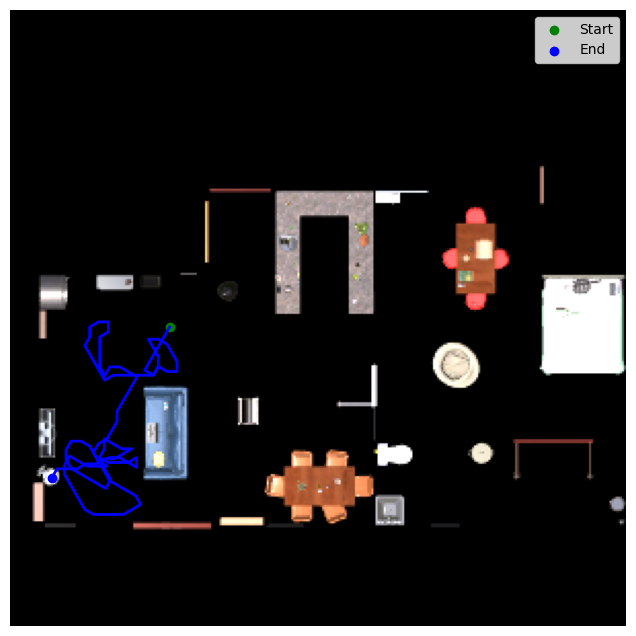

tensor([0.0153, 0.0714, 0.9133])
tensor([0.0162, 0.1147, 0.8691])
tensor([0.0171, 0.1280, 0.8549])
tensor([0.0196, 0.2488, 0.7316])
tensor([0.0737, 0.2296, 0.6967])
tensor([0.0826, 0.3272, 0.5901])
tensor([0.1392, 0.1974, 0.6634])
tensor([0.0408, 0.1765, 0.7827])
tensor([0.0480, 0.0920, 0.8600])
tensor([0.0714, 0.2479, 0.6807])
tensor([0.0593, 0.0919, 0.8488])
tensor([0.0893, 0.2027, 0.7080])
tensor([0.0848, 0.1807, 0.7346])
tensor([0.1103, 0.3214, 0.5683])
tensor([0.1120, 0.3250, 0.5630])
tensor([0.1118, 0.2739, 0.6143])
tensor([0.1402, 0.3308, 0.5290])
tensor([0.1879, 0.3280, 0.4841])
tensor([0.1278, 0.3156, 0.5566])
tensor([0.2178, 0.3891, 0.3931])
tensor([0.2584, 0.3957, 0.3459])
tensor([0.2776, 0.4170, 0.3053])
tensor([0.1209, 0.4649, 0.4142])
tensor([0.2467, 0.3923, 0.3610])
tensor([0.1477, 0.3264, 0.5260])
tensor([0.2441, 0.3858, 0.3701])
tensor([0.2843, 0.4016, 0.3141])
tensor([0.2216, 0.4063, 0.3720])
tensor([0.1938, 0.3677, 0.4384])
tensor([0.1989, 0.4267, 0.3744])
tensor([0.

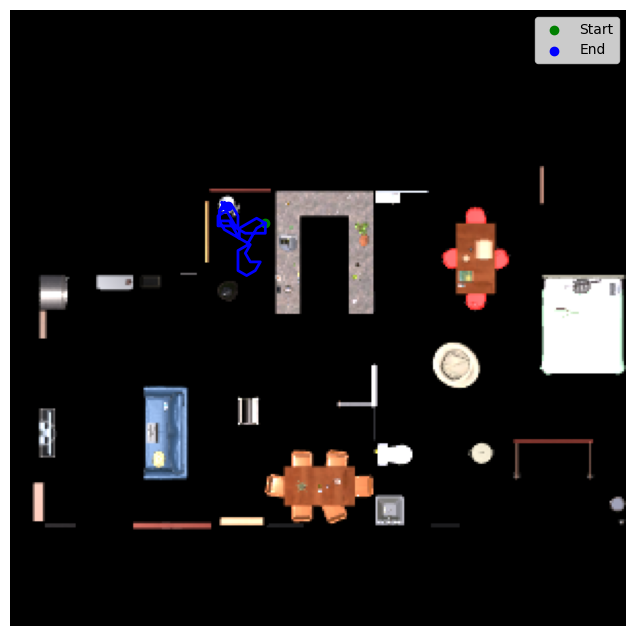

tensor([0.1336, 0.1042, 0.7622])
tensor([0.0550, 0.0628, 0.8822])
tensor([0.0938, 0.0794, 0.8268])
tensor([0.1404, 0.0544, 0.8052])
tensor([0.1676, 0.0760, 0.7564])
tensor([0.1996, 0.1275, 0.6729])
tensor([0.2967, 0.1115, 0.5918])
tensor([0.0817, 0.1154, 0.8028])
tensor([0.1676, 0.0870, 0.7454])
tensor([0.2730, 0.1017, 0.6253])
tensor([0.1092, 0.2185, 0.6724])
tensor([0.3285, 0.3602, 0.3113])
tensor([0.2893, 0.1442, 0.5665])
tensor([0.3268, 0.1591, 0.5141])
tensor([0.2982, 0.1133, 0.5885])
tensor([0.2291, 0.1377, 0.6331])
tensor([0.1909, 0.1104, 0.6987])
tensor([0.3000, 0.0966, 0.6035])
tensor([0.3776, 0.2004, 0.4220])
tensor([0.3326, 0.1103, 0.5571])
tensor([0.2500, 0.1289, 0.6211])
tensor([0.3477, 0.1470, 0.5052])
tensor([0.4284, 0.1313, 0.4403])
tensor([0.4110, 0.1800, 0.4090])
tensor([0.4214, 0.1773, 0.4012])
tensor([0.5222, 0.2349, 0.2429])
tensor([0.4477, 0.2779, 0.2744])
tensor([0.2412, 0.1277, 0.6310])
tensor([0.3771, 0.2511, 0.3719])
tensor([0.3360, 0.3452, 0.3189])
tensor([0.

KeyboardInterrupt: 

In [26]:
from rl import PPO, inference, inference_video_mp4, teleport
import torch

def get_distributions(ppo: PPO, obs_seq, actions_tensor, clip_actor_critic):
    logits, value = ppo.act_and_value(obs_seq, actions_tensor, clip_actor_critic)
    dist = torch.distributions.Categorical(logits=logits)
    # dist = torch.distributions.Categorical(probs=torch.tensor([0.5,0.25,0.25]))
    print(dist.probs)
    return dist


def get_trajectory(controller, position):
    event = controller.step("Pass")
    # Load the topdown image
    topdown = event.third_party_camera_frames[0]
    H, W = topdown.shape[0], topdown.shape[1]

    # positions is List[(x,z)]
    pos = np.array(position)  # shape (T, 2)
    xs = pos[:,0]
    zs = pos[:,1]

    # Convert meters -> pixels
    img_x = (xs - (x_center - house_size)) * (W / (2 * house_size))
    img_y = (zs - (z_center - house_size)) * (H / (2 * house_size))
    img_y = H - img_y
    return topdown, img_x, img_y

points = {
    "center_point": {'x': 3.25, 'y': 0.9009997844696045, 'z': 5.0},
    "trapped": {'x': 5.6405439376831055, 'y': 0.9009993672370911, 'z': 7.591506481170654},
    "inside_room": {'x': 8.765543937683105, 'y': 0.9009993672370911, 'z': 6.941987037658691},
}
for i in range(4):
    for name, point in points.items():
        position = inference_video_mp4(get_distributions, controller, ppo=PPO(0.08), init_position=point, env=clip_env, actor_critic=clip_actor_critic, video_path=f"rollout{name}_{i}.mp4")
        topdown, img_x, img_y = get_trajectory(controller, position)
    
        plt.figure(figsize=(8,8))
        plt.imshow(topdown)
        plt.plot(img_x, img_y, color="blue", linewidth=2)
        plt.scatter(img_x[0], img_y[0], color="green", label="Start")
        plt.scatter(img_x[-1], img_y[-1], color="blue", label="End")
        plt.legend()
        plt.axis("off")
        plt.savefig(f"rollout{name}_{i}.png", bbox_inches='tight', pad_inches=0.1)
        plt.show()

In [11]:
controller.stop()

# Env 8084

In [12]:
from ai2thor.controller import Controller


house = dataset["train"][8084]
controller = Controller(scene=house, snapToGrid=False, rotateStepDegrees=30)
event = controller.step("Pass")
spawn = event.metadata["agent"]["position"]


/home/juyuanli/miniconda3/envs/nav_assistant/lib/python3.11/site-packages/ai2thor/platform.py:154: UserWarning: could not connect to X Display: 5, Can't connect to display ":5": b'Authorization required, but no authorization protocol specified\n'
  warnings.warn(


{'x': 1.5, 'y': 0.9009993672370911, 'z': 2.75}


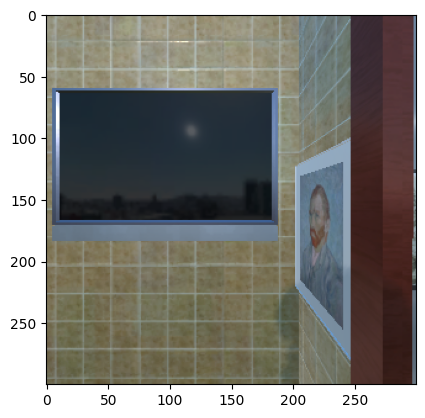

In [13]:
event = teleport(controller)
print(event.metadata["agent"]["position"])
plt.imshow(event.frame)

In [14]:
event = controller.step(
    action="AddThirdPartyCamera",
    position={"x": x_center, "y": 20.0, "z": z_center},
    rotation={"x": 90.0, "y": 0.0, "z": 0.0},
    orthographic=True,
    orthographicSize=house_size,
    fieldOfView=60,
    skyboxColor="black"
)

In [15]:
ENTROPY_COEF = 0.05

ppo = PPO(ENTROPY_COEF)
encoder = FrozenResNetPCAEncoder(FEAT_DIM, torch.zeros(FEAT_DIM, 512), device=DEVICE)
actor = SlidingWindowTransformerActor(FEAT_DIM, NUM_ACTIONS)
critic = SlidingWindowTransformerCritic(FEAT_DIM)
clip_novelty = CLIPNovelty()
clip_env = ClipEnv(clip_novelty)
clip_actor_critic = ActorCritic(encoder, actor, critic)


In [ ]:
from rl import load_actor_critic

load_actor_critic(clip_actor_critic, "data/segment_novelty_8084_49.pt", device=DEVICE)

[🔁] Actor-Critic checkpoint loaded from data/segment_novelty_49.pt


tensor([0.1969, 0.7537, 0.0495], device='cuda:0')
tensor([0.3058, 0.6314, 0.0629], device='cuda:0')
tensor([0.3773, 0.5376, 0.0850], device='cuda:0')
tensor([0.5453, 0.3502, 0.1045], device='cuda:0')
tensor([0.4177, 0.5110, 0.0713], device='cuda:0')
tensor([0.2703, 0.6646, 0.0652], device='cuda:0')
tensor([0.3087, 0.6074, 0.0838], device='cuda:0')
tensor([0.1626, 0.7840, 0.0535], device='cuda:0')
tensor([0.2010, 0.7408, 0.0581], device='cuda:0')
tensor([0.3526, 0.5640, 0.0834], device='cuda:0')
tensor([0.2994, 0.6470, 0.0536], device='cuda:0')
tensor([0.5369, 0.3448, 0.1184], device='cuda:0')
tensor([0.3328, 0.6069, 0.0603], device='cuda:0')
tensor([0.3752, 0.5229, 0.1020], device='cuda:0')
tensor([0.3211, 0.5056, 0.1733], device='cuda:0')
tensor([0.2904, 0.5823, 0.1274], device='cuda:0')
tensor([0.3205, 0.5762, 0.1034], device='cuda:0')
tensor([0.3152, 0.6300, 0.0549], device='cuda:0')
tensor([0.3987, 0.5065, 0.0948], device='cuda:0')
tensor([0.2995, 0.6159, 0.0846], device='cuda:0')


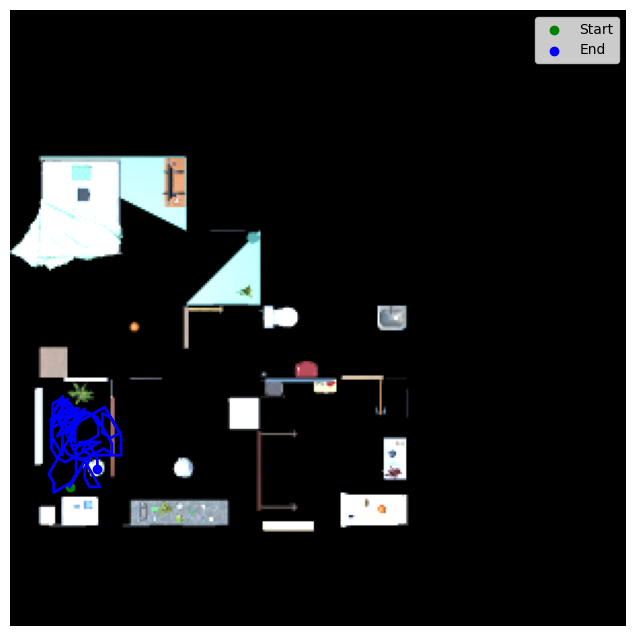

tensor([0.0847, 0.8444, 0.0709], device='cuda:0')
tensor([0.0058, 0.9843, 0.0099], device='cuda:0')
tensor([0.0520, 0.9201, 0.0279], device='cuda:0')
tensor([0.1256, 0.8146, 0.0598], device='cuda:0')
tensor([0.0947, 0.8875, 0.0178], device='cuda:0')
tensor([0.1058, 0.8565, 0.0377], device='cuda:0')
tensor([0.1434, 0.7862, 0.0704], device='cuda:0')
tensor([0.1599, 0.7143, 0.1259], device='cuda:0')
tensor([0.0745, 0.8919, 0.0336], device='cuda:0')
tensor([0.0241, 0.9447, 0.0312], device='cuda:0')
tensor([0.0401, 0.9332, 0.0267], device='cuda:0')
tensor([0.0148, 0.9686, 0.0166], device='cuda:0')
tensor([0.0189, 0.9429, 0.0383], device='cuda:0')
tensor([0.0262, 0.9394, 0.0344], device='cuda:0')
tensor([0.1578, 0.7448, 0.0974], device='cuda:0')
tensor([0.0233, 0.9397, 0.0370], device='cuda:0')
tensor([0.0309, 0.9401, 0.0291], device='cuda:0')
tensor([0.0236, 0.9355, 0.0409], device='cuda:0')
tensor([0.1422, 0.7788, 0.0790], device='cuda:0')
tensor([0.2391, 0.6033, 0.1577], device='cuda:0')


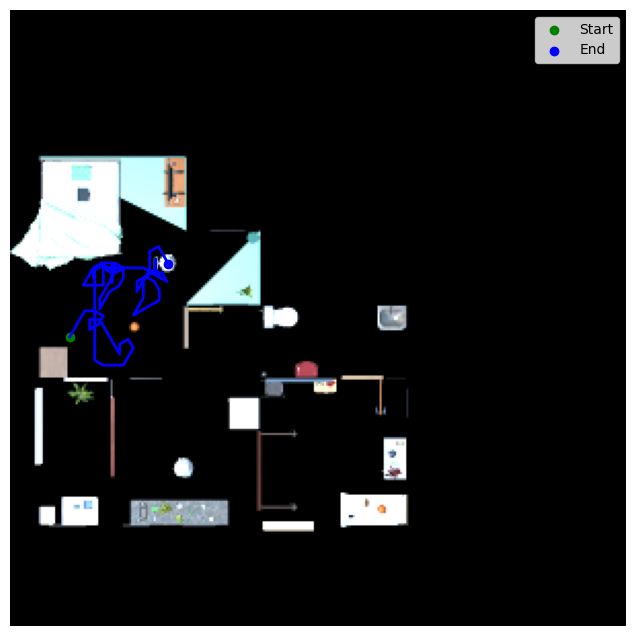

tensor([0.1158, 0.8564, 0.0278], device='cuda:0')
tensor([0.3168, 0.6511, 0.0321], device='cuda:0')
tensor([0.2915, 0.6517, 0.0568], device='cuda:0')
tensor([0.1077, 0.8552, 0.0371], device='cuda:0')
tensor([0.0892, 0.8917, 0.0191], device='cuda:0')
tensor([0.1583, 0.7550, 0.0867], device='cuda:0')
tensor([0.4484, 0.3873, 0.1643], device='cuda:0')
tensor([0.1784, 0.7252, 0.0965], device='cuda:0')
tensor([0.5197, 0.3529, 0.1274], device='cuda:0')
tensor([0.3828, 0.4601, 0.1571], device='cuda:0')
tensor([0.2043, 0.6217, 0.1740], device='cuda:0')
tensor([0.2800, 0.5799, 0.1401], device='cuda:0')
tensor([0.4954, 0.3824, 0.1223], device='cuda:0')
tensor([0.5517, 0.3725, 0.0758], device='cuda:0')
tensor([0.2207, 0.6887, 0.0906], device='cuda:0')
tensor([0.1171, 0.7936, 0.0894], device='cuda:0')
tensor([0.2164, 0.6761, 0.1074], device='cuda:0')
tensor([0.0932, 0.7939, 0.1129], device='cuda:0')
tensor([0.2272, 0.5027, 0.2701], device='cuda:0')
tensor([0.1129, 0.8251, 0.0620], device='cuda:0')


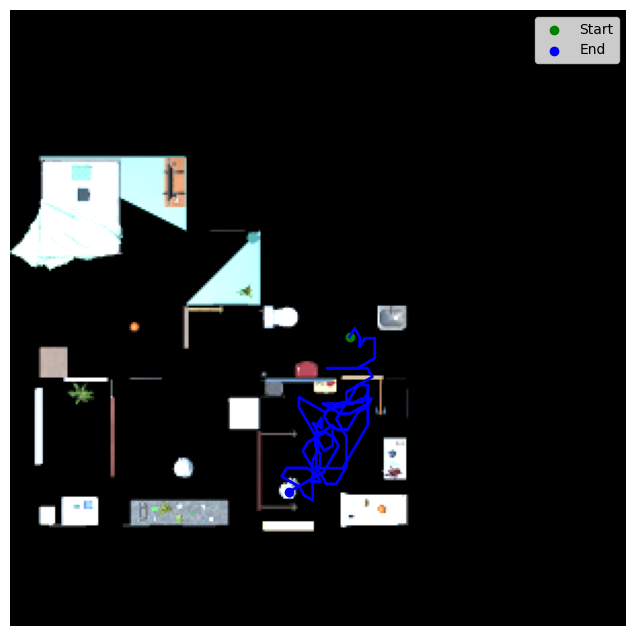

tensor([0.2055, 0.7566, 0.0379], device='cuda:0')
tensor([0.4787, 0.4525, 0.0688], device='cuda:0')
tensor([0.4159, 0.4899, 0.0942], device='cuda:0')
tensor([0.5571, 0.3392, 0.1037], device='cuda:0')
tensor([0.2108, 0.7392, 0.0500], device='cuda:0')
tensor([0.5514, 0.3341, 0.1146], device='cuda:0')
tensor([0.1712, 0.7782, 0.0506], device='cuda:0')
tensor([0.2971, 0.6318, 0.0711], device='cuda:0')
tensor([0.1816, 0.7520, 0.0664], device='cuda:0')
tensor([0.3152, 0.5874, 0.0975], device='cuda:0')
tensor([0.5546, 0.3481, 0.0974], device='cuda:0')
tensor([0.2464, 0.6747, 0.0789], device='cuda:0')
tensor([0.3201, 0.5927, 0.0872], device='cuda:0')
tensor([0.3091, 0.6074, 0.0835], device='cuda:0')
tensor([0.2118, 0.7448, 0.0434], device='cuda:0')
tensor([0.3010, 0.6135, 0.0855], device='cuda:0')
tensor([0.2110, 0.7135, 0.0754], device='cuda:0')
tensor([0.5487, 0.3984, 0.0528], device='cuda:0')
tensor([0.3529, 0.5762, 0.0709], device='cuda:0')
tensor([0.4903, 0.4249, 0.0848], device='cuda:0')


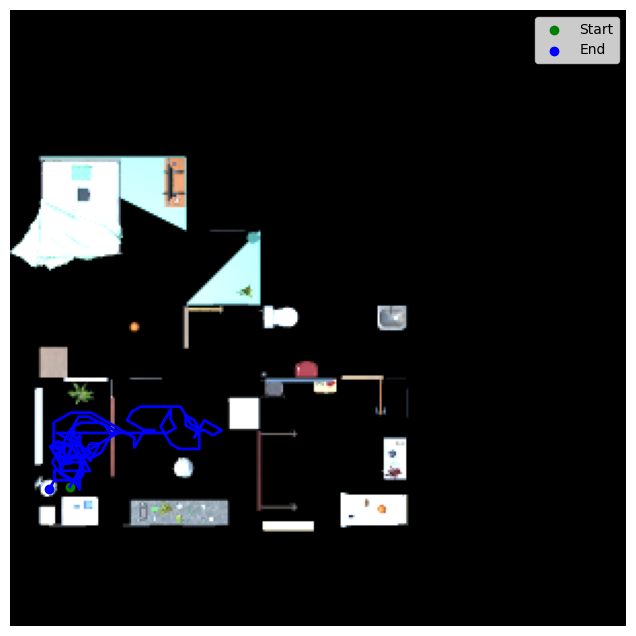

tensor([0.0660, 0.9090, 0.0250], device='cuda:0')
tensor([0.0690, 0.8840, 0.0470], device='cuda:0')
tensor([0.0587, 0.9152, 0.0261], device='cuda:0')
tensor([0.0776, 0.8967, 0.0257], device='cuda:0')
tensor([0.1612, 0.8091, 0.0297], device='cuda:0')
tensor([0.0681, 0.9195, 0.0124], device='cuda:0')
tensor([0.0557, 0.9142, 0.0301], device='cuda:0')
tensor([0.1382, 0.7613, 0.1005], device='cuda:0')
tensor([0.0471, 0.9206, 0.0323], device='cuda:0')
tensor([0.0441, 0.9249, 0.0310], device='cuda:0')
tensor([0.0416, 0.9171, 0.0413], device='cuda:0')
tensor([0.0248, 0.9557, 0.0196], device='cuda:0')
tensor([0.0402, 0.9231, 0.0367], device='cuda:0')
tensor([0.0283, 0.9285, 0.0431], device='cuda:0')
tensor([0.1294, 0.7617, 0.1089], device='cuda:0')
tensor([0.2312, 0.6298, 0.1390], device='cuda:0')
tensor([0.0128, 0.9678, 0.0194], device='cuda:0')
tensor([0.1745, 0.7671, 0.0584], device='cuda:0')
tensor([0.3591, 0.4493, 0.1916], device='cuda:0')
tensor([0.2817, 0.6085, 0.1098], device='cuda:0')


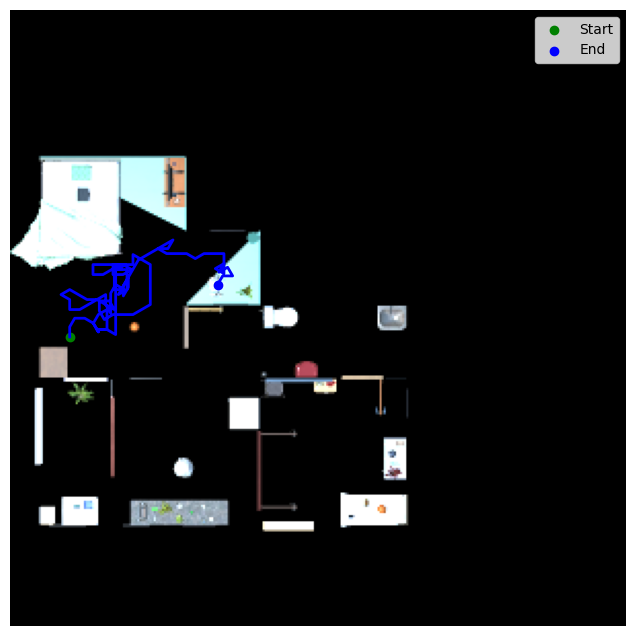

tensor([0.1261, 0.8497, 0.0242], device='cuda:0')
tensor([0.1279, 0.8407, 0.0313], device='cuda:0')
tensor([0.2475, 0.6749, 0.0776], device='cuda:0')
tensor([0.1626, 0.7986, 0.0388], device='cuda:0')
tensor([0.1362, 0.8343, 0.0295], device='cuda:0')
tensor([0.2135, 0.7298, 0.0567], device='cuda:0')
tensor([0.3651, 0.5389, 0.0960], device='cuda:0')
tensor([0.5776, 0.3069, 0.1155], device='cuda:0')
tensor([0.3408, 0.5344, 0.1249], device='cuda:0')
tensor([0.3270, 0.5109, 0.1621], device='cuda:0')
tensor([0.3604, 0.5282, 0.1115], device='cuda:0')
tensor([0.3118, 0.5501, 0.1381], device='cuda:0')
tensor([0.1108, 0.7811, 0.1081], device='cuda:0')
tensor([0.0933, 0.8243, 0.0824], device='cuda:0')
tensor([0.1019, 0.8149, 0.0833], device='cuda:0')
tensor([0.1590, 0.7543, 0.0867], device='cuda:0')
tensor([0.3011, 0.6240, 0.0748], device='cuda:0')
tensor([0.1708, 0.7760, 0.0532], device='cuda:0')
tensor([0.2385, 0.6919, 0.0697], device='cuda:0')
tensor([0.2592, 0.6337, 0.1071], device='cuda:0')


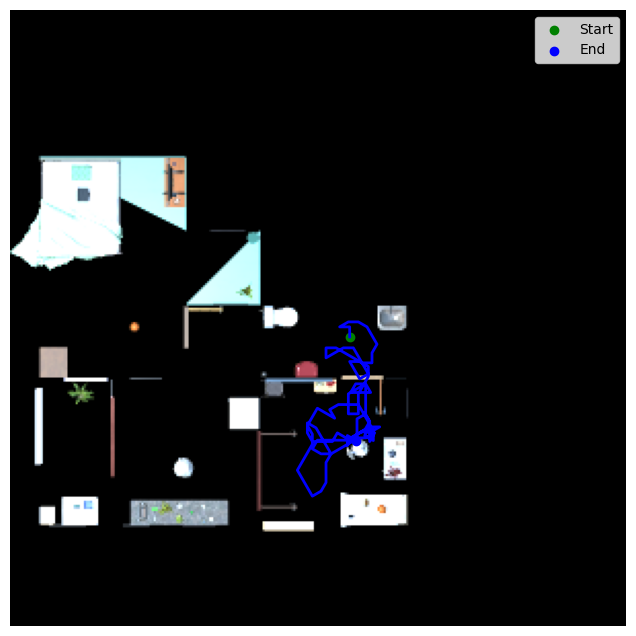

tensor([0.1419, 0.8073, 0.0508], device='cuda:0')
tensor([0.3440, 0.5549, 0.1012], device='cuda:0')
tensor([0.3565, 0.5938, 0.0497], device='cuda:0')
tensor([0.3050, 0.6192, 0.0758], device='cuda:0')
tensor([0.1653, 0.7903, 0.0445], device='cuda:0')
tensor([0.3993, 0.4950, 0.1057], device='cuda:0')
tensor([0.2856, 0.6400, 0.0744], device='cuda:0')
tensor([0.3365, 0.5816, 0.0819], device='cuda:0')
tensor([0.1279, 0.8120, 0.0601], device='cuda:0')
tensor([0.4507, 0.4720, 0.0772], device='cuda:0')
tensor([0.2272, 0.7282, 0.0446], device='cuda:0')
tensor([0.3976, 0.5167, 0.0857], device='cuda:0')
tensor([0.1942, 0.7533, 0.0525], device='cuda:0')
tensor([0.3698, 0.5527, 0.0775], device='cuda:0')
tensor([0.3901, 0.5643, 0.0456], device='cuda:0')
tensor([0.2273, 0.6995, 0.0732], device='cuda:0')
tensor([0.3204, 0.6504, 0.0293], device='cuda:0')
tensor([0.4452, 0.4979, 0.0569], device='cuda:0')
tensor([0.3235, 0.6103, 0.0661], device='cuda:0')
tensor([0.5199, 0.4046, 0.0756], device='cuda:0')


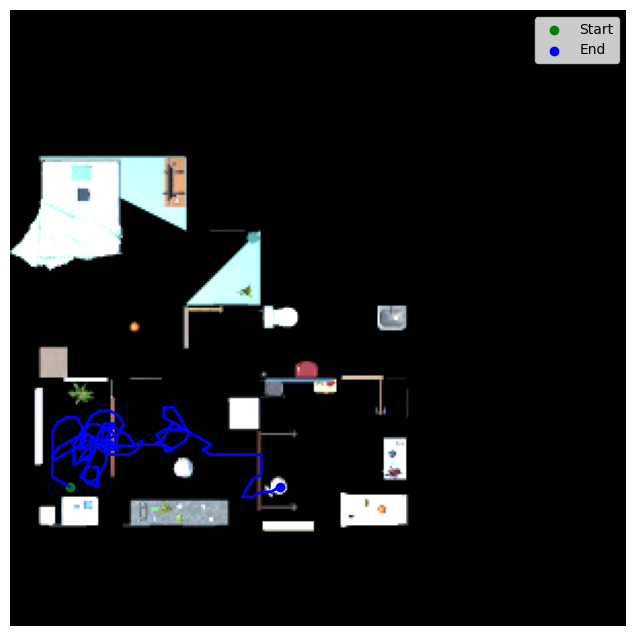

tensor([0.1585, 0.7767, 0.0647], device='cuda:0')
tensor([0.0078, 0.9807, 0.0115], device='cuda:0')
tensor([0.0951, 0.8586, 0.0463], device='cuda:0')
tensor([0.0204, 0.9524, 0.0272], device='cuda:0')
tensor([0.0979, 0.8450, 0.0572], device='cuda:0')
tensor([0.0552, 0.9077, 0.0371], device='cuda:0')
tensor([0.0850, 0.8981, 0.0169], device='cuda:0')
tensor([0.1321, 0.8372, 0.0307], device='cuda:0')
tensor([0.1171, 0.8349, 0.0480], device='cuda:0')
tensor([0.2133, 0.7051, 0.0817], device='cuda:0')
tensor([0.1233, 0.7808, 0.0960], device='cuda:0')
tensor([0.1303, 0.7414, 0.1283], device='cuda:0')
tensor([0.0782, 0.8650, 0.0568], device='cuda:0')
tensor([0.0631, 0.8720, 0.0649], device='cuda:0')
tensor([0.0483, 0.9040, 0.0477], device='cuda:0')
tensor([0.0254, 0.9560, 0.0186], device='cuda:0')
tensor([0.0234, 0.9231, 0.0535], device='cuda:0')
tensor([0.0450, 0.8945, 0.0604], device='cuda:0')
tensor([0.1069, 0.8080, 0.0851], device='cuda:0')
tensor([0.2329, 0.6317, 0.1354], device='cuda:0')


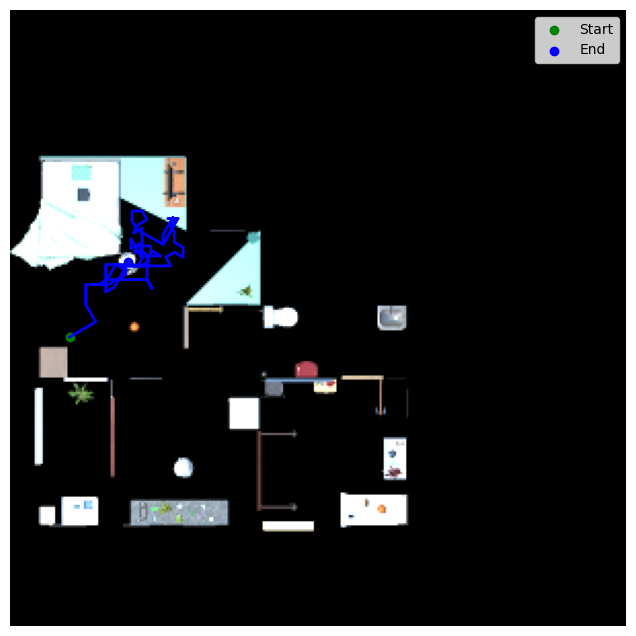

tensor([0.2237, 0.7547, 0.0216], device='cuda:0')
tensor([0.2014, 0.7756, 0.0231], device='cuda:0')
tensor([0.3151, 0.6267, 0.0582], device='cuda:0')
tensor([0.1619, 0.7532, 0.0849], device='cuda:0')
tensor([0.1679, 0.7878, 0.0443], device='cuda:0')
tensor([0.3201, 0.6034, 0.0766], device='cuda:0')
tensor([0.2589, 0.7034, 0.0377], device='cuda:0')
tensor([0.2656, 0.6756, 0.0589], device='cuda:0')
tensor([0.0701, 0.8690, 0.0610], device='cuda:0')
tensor([0.3032, 0.5874, 0.1094], device='cuda:0')
tensor([0.3606, 0.5346, 0.1048], device='cuda:0')
tensor([0.5533, 0.3810, 0.0657], device='cuda:0')
tensor([0.5237, 0.4234, 0.0529], device='cuda:0')
tensor([0.4303, 0.4934, 0.0763], device='cuda:0')
tensor([0.2014, 0.7390, 0.0596], device='cuda:0')
tensor([0.1676, 0.7755, 0.0569], device='cuda:0')
tensor([0.1048, 0.8020, 0.0932], device='cuda:0')
tensor([0.2950, 0.5256, 0.1794], device='cuda:0')
tensor([0.1886, 0.7154, 0.0959], device='cuda:0')
tensor([0.2924, 0.5816, 0.1260], device='cuda:0')


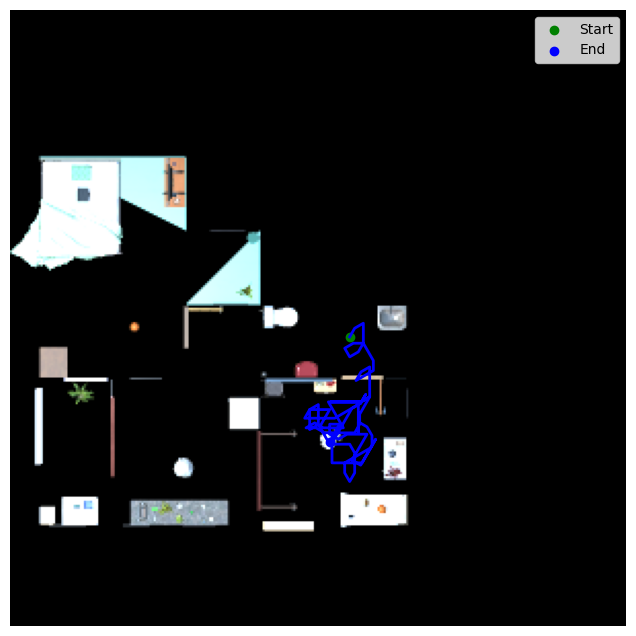

tensor([0.2111, 0.7422, 0.0467], device='cuda:0')
tensor([0.3208, 0.6010, 0.0782], device='cuda:0')
tensor([0.2408, 0.7178, 0.0414], device='cuda:0')
tensor([0.2311, 0.7165, 0.0525], device='cuda:0')
tensor([0.2531, 0.6909, 0.0560], device='cuda:0')
tensor([0.2962, 0.6516, 0.0522], device='cuda:0')
tensor([0.2719, 0.6591, 0.0690], device='cuda:0')
tensor([0.3228, 0.6080, 0.0692], device='cuda:0')
tensor([0.1983, 0.7540, 0.0477], device='cuda:0')
tensor([0.5259, 0.4048, 0.0693], device='cuda:0')
tensor([0.1402, 0.7790, 0.0808], device='cuda:0')
tensor([0.4640, 0.4731, 0.0629], device='cuda:0')
tensor([0.3122, 0.5927, 0.0951], device='cuda:0')
tensor([0.5838, 0.2867, 0.1294], device='cuda:0')
tensor([0.5021, 0.4142, 0.0838], device='cuda:0')
tensor([0.3992, 0.5167, 0.0841], device='cuda:0')
tensor([0.3039, 0.5705, 0.1256], device='cuda:0')
tensor([0.4779, 0.4367, 0.0854], device='cuda:0')
tensor([0.5001, 0.4279, 0.0720], device='cuda:0')
tensor([0.3943, 0.4657, 0.1400], device='cuda:0')


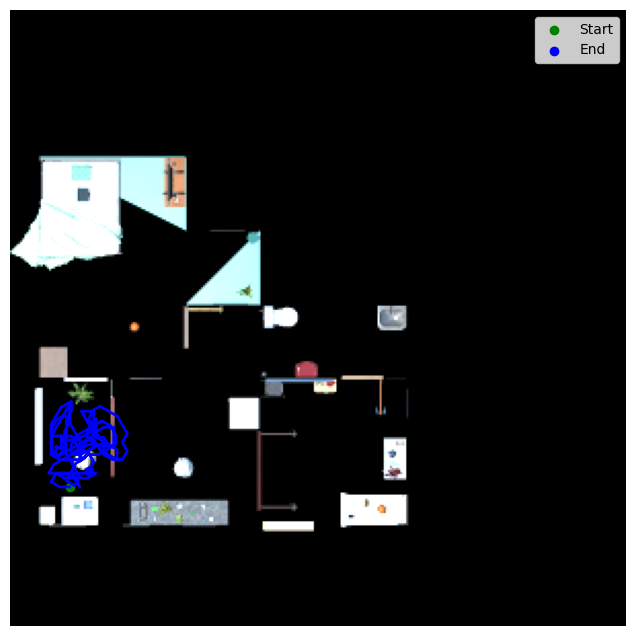

tensor([0.0372, 0.9478, 0.0150], device='cuda:0')
tensor([0.0964, 0.8606, 0.0430], device='cuda:0')
tensor([0.1763, 0.8013, 0.0224], device='cuda:0')
tensor([0.1140, 0.8520, 0.0340], device='cuda:0')
tensor([0.1097, 0.8540, 0.0363], device='cuda:0')
tensor([0.2072, 0.7094, 0.0834], device='cuda:0')
tensor([0.3229, 0.5114, 0.1657], device='cuda:0')
tensor([0.2694, 0.6500, 0.0806], device='cuda:0')
tensor([0.3027, 0.5520, 0.1453], device='cuda:0')
tensor([0.1862, 0.6736, 0.1403], device='cuda:0')
tensor([0.2520, 0.6139, 0.1341], device='cuda:0')
tensor([0.0409, 0.9018, 0.0573], device='cuda:0')
tensor([0.0758, 0.8515, 0.0726], device='cuda:0')
tensor([0.1527, 0.6660, 0.1813], device='cuda:0')
tensor([0.0670, 0.8708, 0.0621], device='cuda:0')
tensor([0.1044, 0.8214, 0.0741], device='cuda:0')
tensor([0.1028, 0.8593, 0.0379], device='cuda:0')
tensor([0.0294, 0.9495, 0.0211], device='cuda:0')
tensor([0.0206, 0.9394, 0.0400], device='cuda:0')
tensor([0.2029, 0.6622, 0.1349], device='cuda:0')


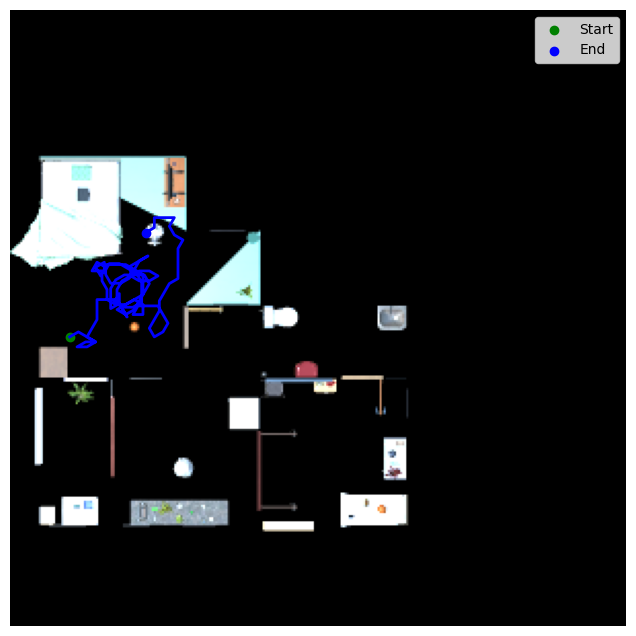

tensor([0.1634, 0.8163, 0.0203], device='cuda:0')
tensor([0.3689, 0.5789, 0.0522], device='cuda:0')
tensor([0.2167, 0.7083, 0.0750], device='cuda:0')
tensor([0.5884, 0.3609, 0.0507], device='cuda:0')
tensor([0.2065, 0.7126, 0.0810], device='cuda:0')
tensor([0.1256, 0.8543, 0.0201], device='cuda:0')
tensor([0.1575, 0.7779, 0.0646], device='cuda:0')
tensor([0.1973, 0.7493, 0.0535], device='cuda:0')
tensor([0.5194, 0.3396, 0.1409], device='cuda:0')
tensor([0.5464, 0.3962, 0.0574], device='cuda:0')
tensor([0.3165, 0.5465, 0.1371], device='cuda:0')
tensor([0.5252, 0.3882, 0.0867], device='cuda:0')
tensor([0.4363, 0.4606, 0.1031], device='cuda:0')
tensor([0.2454, 0.6475, 0.1072], device='cuda:0')
tensor([0.1760, 0.7117, 0.1124], device='cuda:0')
tensor([0.2235, 0.6371, 0.1394], device='cuda:0')
tensor([0.1296, 0.7662, 0.1042], device='cuda:0')
tensor([0.0876, 0.8143, 0.0981], device='cuda:0')
tensor([0.0522, 0.9152, 0.0326], device='cuda:0')
tensor([0.3414, 0.4890, 0.1696], device='cuda:0')


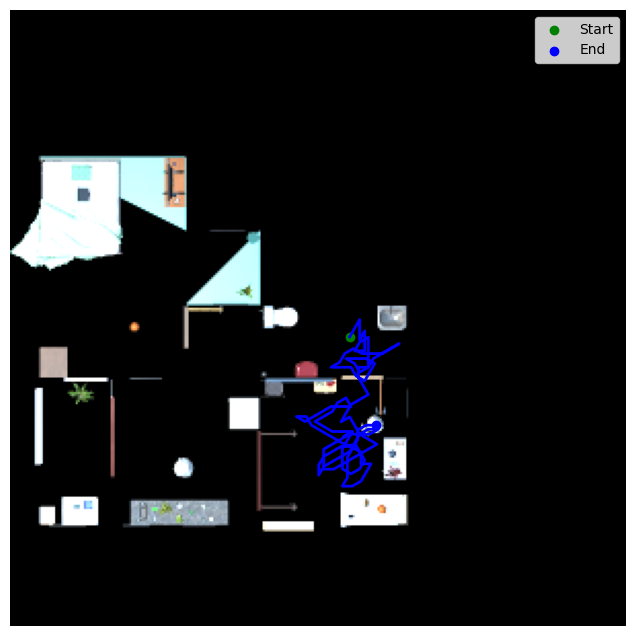

In [20]:
import numpy as np
import matplotlib.pyplot as plt
points = {
    "center_point": {'x': 0.75, 'y': 0.9009993672370911, 'z': 1.0},
    "inside_bedroom": {'x': 0.75, 'y': 0.9009993672370911, 'z': 4.75},
    "inside_toilet": {'x': 7.75, 'y': 0.9009997844696045, 'z': 4.75},
}

for i in range(4):
    for name, point in points.items():
        position = inference_video_mp4(get_distributions, controller, ppo=PPO(0.08), init_position=point, env=clip_env, actor_critic=clip_actor_critic, video_path=f"rollout{name}_{i}.mp4")
        topdown, img_x, img_y = get_trajectory(controller, position)

        plt.figure(figsize=(8,8))
        plt.imshow(topdown)
        plt.plot(img_x, img_y, color="blue", linewidth=2)
        plt.scatter(img_x[0], img_y[0], color="green", label="Start")
        plt.scatter(img_x[-1], img_y[-1], color="blue", label="End")
        plt.legend()
        plt.axis("off")
        plt.savefig(f"rollout{name}_{i}.png", bbox_inches='tight', pad_inches=0.1)
        plt.show()